# Titanic Kaggle Machine Learning Challenge

I am attempting the challenge to try my first ML algorithm 

## Data Dictionary


| Variable | Definiton                                  | Key                                            |   |   |
|----------|--------------------------------------------|------------------------------------------------|---|---|
| survival | Survival                                   | 0 = No, 1 = Yes                                |   |   |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |   |   |
| sex      | Sex                                        |                                                |   |   |
| Age      | Age in years                               |                                                |   |   |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |   |   |
| parch    | # of parents / children aboard the Titanic |                                                |   |   |
| ticket   | Ticket number                              |                                                |   |   |
| fare     | Passenger fare                             |                                                |   |   |
| cabin    | Cabin number                               |                                                |   |   |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |   |   |


## Variable notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Loading the dataset

In [166]:
# loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')
gender_data = pd.read_csv('titanic/gender_submission.csv')

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [253]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [199]:
gender_data.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [200]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


It can be observed that the datasets have common columns and `test` dataset seems to be a continuation of the `train` dataset. Therefore, I will concatinate them

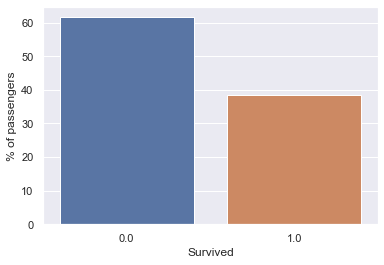

In [224]:
ax = sns.barplot(x='Survived', y=train_data['Survived'].value_counts(normalize=True)*100, data= all_data)
ax.set(ylabel= '% of passengers')
plt.show()

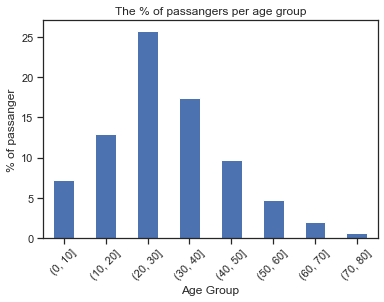

In [243]:
intervals= pd.interval_range(start=0, end=80, freq= 10)
grouped_freq_table_10 = train_data['Age'].value_counts(bins= intervals, normalize= True).sort_index() * 100
ax = grouped_freq_table_10.plot.bar(xlabel= 'Age Group',
                                    ylabel= '% of passanger', rot=45,
                                    title= 'The % of passangers per age group')

In [202]:
s1 = train_data[train_data['Survived'] == 1]['Sex'].value_counts(normalize=True).sort_index()*100
s1

female    68.128655
male      31.871345
Name: Sex, dtype: float64

In [207]:
s0 = train_data[train_data['Survived'] == 0]['Sex'].value_counts(normalize=True).sort_index()*100
s0

female    14.754098
male      85.245902
Name: Sex, dtype: float64

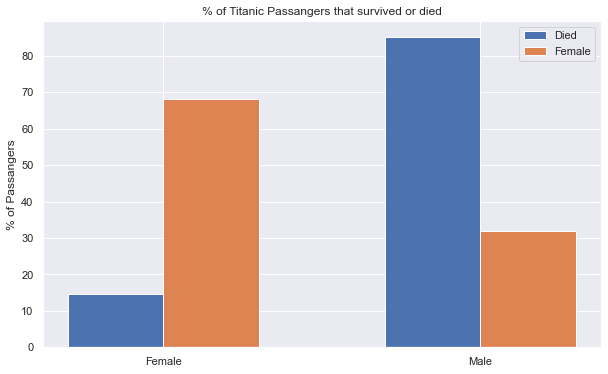

In [219]:
labels = ['Female', 'Male']

width= 0.3 #width of the bars
x = np.arange(len(labels))

fig, ax= plt.subplots(figsize=(10, 6))

died = ax.bar(x - width/2, s0, width,
                label='Died')
survived = ax.bar(x + width/2, s1, width,
                label= 'Female')

ax.set_ylabel('% of Passangers')
ax.set_title('% of Titanic Passangers that survived or died')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# fig.tight_layout()
plt.show()

Male category comprises 85% of the passengers that died, whereas the Female category comprises 68% of the passengers that survived.

Let's see the survival rate of both Males and Females according to their age group

/Users/valentinciocirlan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


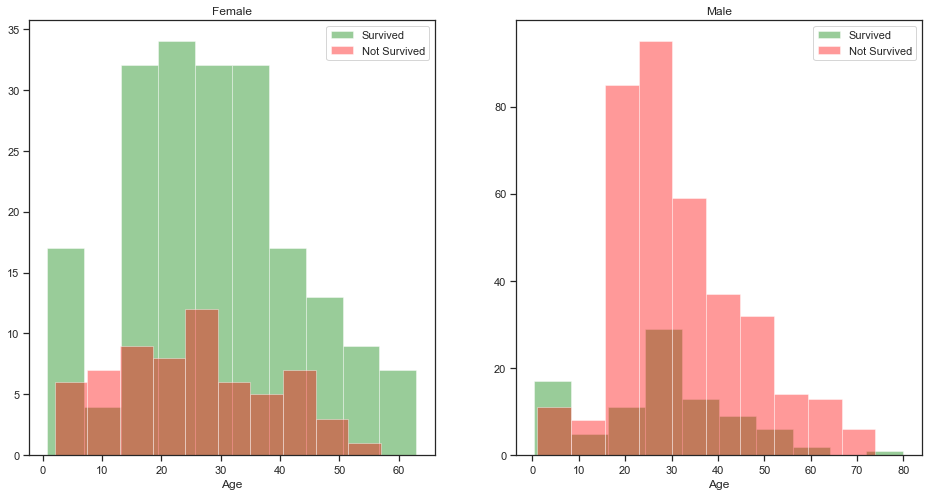

In [268]:
sns.set_theme(style='ticks')

fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(16,8))

#separaring the sexes in different dataframes
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']

#plotting the graph for women
ax= sns.distplot(a= women[women['Survived']==1].Age.dropna(), bins= 10, label= 'Survived', ax= axes[0], kde= False, color='green')
ax= sns.distplot(a= women[women['Survived']==0].Age.dropna(), bins= 10, label= 'Not Survived', ax= axes[0], kde= False, color= 'red')
ax.set_title('Female')
ax.legend()

# plotting the graph for men
ax = sns.distplot(a= men[men['Survived']==1].Age.dropna(), bins= 10, label= 'Survived', ax= axes[1], kde= False, color='green')
ax = sns.distplot(a= men[men['Survived']==0].Age.dropna(), bins= 10, label= 'Not Survived', ax= axes[1], kde= False, color= 'red')
ax.legend()
_ = ax.set_title('Male')


## Which Age survived?

/Users/valentinciocirlan/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Age'>

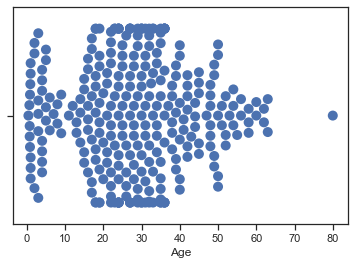

In [270]:
survivors = train_data.loc[train_data.Survived==1]
sns.swarmplot(x= 'Age', data=survivors, size= 10)